# Imports

In [30]:
# Import packages

import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
from earthpy.plot import es
import seaborn as sns
from matplotlib import patches as mpatches, colors
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
from shapely.geometry import Point,mapping,box
import rasterio as rio
import rasterstats as rs
# Plotting extent is used to plot raster & vector data together
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.mask import mask
import earthpy.mask as em
from rasterio.warp import calculate_default_transform, reproject, Resampling
from pyproj import Proj, transform
from glob import glob
import pandas as pd
pd.options.display.max_rows = 250

import warnings
warnings.filterwarnings('ignore')

# Get data and set working directory
# data = et.data.get_data('spatial-vector-lidar')
# os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))
# Downloading from https://ndownloader.figshare.com/files/12459464 
# Extracted output to /root/earth-analytics/data/spatial-vector-lidar/.

# Adjust plot font sizes
sns.set(font_scale=1.5)
sns.set_style("white")

In [5]:
path = "/Users/purgatorid/Documents/GitHub/canopy-gis/data_collection/data/Geometry/osm_logging_roads/osm_logging_roads.shp"

# # Import shapefile using geopandas
logging_roads = gpd.read_file(path)

In [7]:
logging_roads.shape

(260826, 25)

In [10]:
logging_roads.columns

Index(['osm_id', 'access', 'bridge', 'end_date', 'ferry', 'ford', 'highway',
       'informal', 'maxspeed', 'name', 'oneway', 'opening_ho', 'operator',
       'ref', 'route', 'seasonal', 'smoothness', 'source', 'start_date',
       'surface', 'trail_visi', 'tunnel', 'width', 'st_length_', 'geometry'],
      dtype='object')

In [32]:
logging_roads["source"].value_counts().to_csv("logging_roads_source.csv")

In [33]:
logging_roads['start_date'].value_counts().to_csv("logging_roads_osm_start_date.csv")

In [9]:
sjer_plot_locations.crs

<Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 120°W to 114°W - by country
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

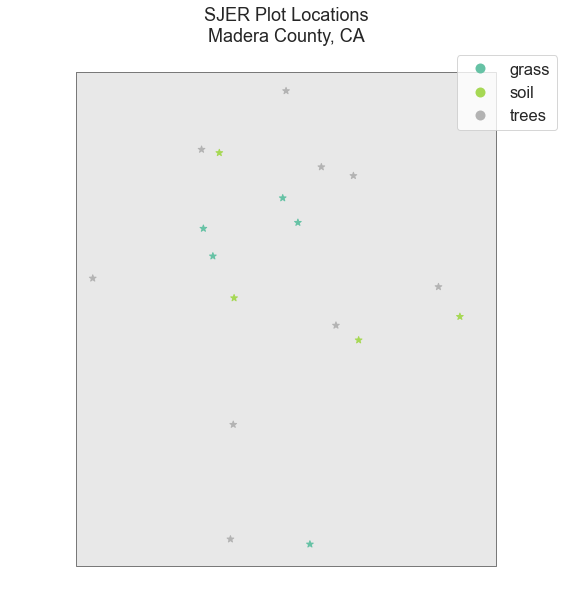

In [56]:
# Define path to crop boundary
sjer_crop_extent_path = os.path.join("data", "spatial-vector-lidar", 
                                     "california", "neon-sjer-site", 
                                     "vector_data", "SJER_crop.shp")

# Import crop boundary
sjer_crop_extent = gpd.read_file(sjer_crop_extent_path)
fig, ax = plt.subplots(figsize=(10, 10))

# First setup the plot using the crop_extent layer as the base layer
sjer_crop_extent.plot(color='lightgrey',
                      edgecolor='black',
                      alpha=.5,
                      ax=ax)

# Add another layer using the same ax
sjer_plot_locations.plot(column='plot_type',
                         categorical=True,
                         marker='*',
                         legend=True,
                         markersize=50,
                         cmap='Set2', ax=ax)
# Clean up axes
ax.set_title('SJER Plot Locations\nMadera County, CA')
ax.set_axis_off()

plt.axis('equal')
plt.show()